# Question 1 Principal Component Analysis

Download dataset from [this link](https://drive.google.com/file/d/1U6FDSQQSUzvw3Ygtgp8I5ea0-dL-orSE/view?usp=sharing).


In this problem we will be applying PCA on the Lending Club loan dataset. A simplified version of the dataset with reduced number of samples. Please use the dataset in the above link. We will use reduced number of features and only two classes as shown below.

In [1]:
import os, sys, re
import time
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the csv file and fill Nan/empty values as 0
dataset = pd.read_csv('loan.csv')
df = dataset.fillna(0)

# We will be using only two classes and group them as below
def LoanResult(status):
    if (status == 'Fully Paid') or (status == 'Current'):
        return 1
    else:
        return 0

df['loan_status'] = df['loan_status'].apply(LoanResult)

# Set of features which indicate the dimensionality of the data
df = df[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
             'emp_length', 'home_ownership','annual_inc', 'verification_status', 'loan_status',
             'purpose','addr_state', 'dti','open_acc', 'pub_rec', 'revol_bal', 'revol_util', 
             'initial_list_status', 'recoveries','collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
             'application_type', 'tot_coll_amt', 'tot_cur_bal', 'avg_cur_bal', 'chargeoff_within_12_mths',
             'pub_rec_bankruptcies', 'tax_liens', 'debt_settlement_flag']]

#For simplicity, in this question, we select all columns that do not contain integer of float type of data. Then, one hot encoding is performed.
df_cat = df.select_dtypes(exclude=['int64', 'float64'])
df = pd.get_dummies(df, df_cat.columns.values)

df.shape

# We select the `loan_status` column as the target column.  

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (123,124,125,128,129,130,133,139,140,141) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(226067, 161)

Use Principal Component Analysis (PCA) to solve this problem.  

* **1.1** Perform the following steps to prepare the dataset:

    * Select the 'loan_status' column as the target column and the rest of the columns from the dataframe df as X. 

    * Split the dataset into train and test set with 25% data in test set and random_state = 42

    * Perform [Min-Max Scaling](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) on the dataset. Remember that when we have training and testing data, we fit preprocessing parameters on training data and apply them to all testing data. You should scale only the features (independent variables), not the target variable y.
    
    Note: X should have 160 features.
    

* **1.2** Use [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) and reduce the dimension of X to the following components: 100, 30, 10. For each of the three models, print the percentage(%) of variance captured by each of the compnonets and plot the scree plot the [scree plot]
(https://www.kindsonthegenius.com/principal-components-analysispca-in-python-step-by-step/).  (PCA should be fit only on X_train).


* **1.3** Train LogisticRegression(random_state=4,max_iter=10000) with the full dimension X and each of the redued dimension X from PCA in the previous step (100, 30 and 10 dimensions). Print the classification reports for all the models -  this will print the class-wise Precision, Recall and F1 score. More details on classification report can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) (Note: you will be training logistic regression 4 times (160, 100, 30 and 10 dimensional X) and will print 4 classification reports)


* **1.4** [Plot](https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_roc_curve_visualization_api.html#sphx-glr-auto-examples-miscellaneous-plot-roc-curve-visualization-api-py) the ROC curves for all models (trained using dataset containing all dimensions and dataset containing reduced dimensions, total 4 models). ROC curve is used to study the classifier's output. Details on ROC can be found [here](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html).


* **1.5** What do you observe from the ROC curves? 

# ANSWER

### 1.1

In [2]:
y=df['loan_status']
X=df.loc[:, df.columns != 'loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler()
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)


### 1.2

In [3]:
list_100=list(range(1,101))
list_30=list(range(1,31))
list_10=list(range(1,11))

PC_list_100=[]
PC_list_30=[]
PC_list_10=[]

for i in list_100:
    PC_list_100.append("PC"+str(i))
    
for i in list_30:
    PC_list_30.append("PC"+str(i))

for i in list_10:
    PC_list_10.append("PC"+str(i))




In [4]:
from sklearn.decomposition import PCA

pca100 = PCA(n_components=100)
principalcomponents100 = pca100.fit_transform(X_train)
pca100.fit(X_train)

pca100_test=pca100.fit_transform(X_test)


df_principalcomponents100 = pd.DataFrame(data=principalcomponents100, columns = [PC_list_100],index=y_train.index)

print("100 Principal Components\n",pca100.explained_variance_ratio_ * 100)

pca30 = PCA(n_components=30)
principalcomponents30 = pca30.fit_transform(X_train)
pca30.fit(X_train)

pca30_test=pca30.fit_transform(X_test)
df_principalcomponents30 = pd.DataFrame(data=principalcomponents30, columns = [PC_list_30],index=y_train.index)
print("\n\n30 Principal Components\n",pca30.explained_variance_ratio_ * 100)

pca10 = PCA(n_components=10)
principalcomponents10 = pca10.fit_transform(X_train)
pca10.fit(X_train)

pca10_test=pca10.fit_transform(X_test)
df_principalcomponents10 = pd.DataFrame(data=principalcomponents10, columns = [PC_list_10],index=y_train.index)
print("\n\n10 Principal Components\n",pca10.explained_variance_ratio_ * 100)


100 Principal Components
 [9.20274634 7.07284071 6.0068521  5.46997039 4.94915606 4.50679341
 3.83857627 3.37683016 3.17794602 2.88601816 2.79584207 2.30431145
 2.19944526 1.83242138 1.56240804 1.49994905 1.27416332 1.24186348
 1.19885385 1.16462275 1.15024191 1.08854981 1.04480912 1.02749501
 0.97930125 0.97132922 0.94253493 0.93444455 0.91247183 0.84663247
 0.82693407 0.80725353 0.78744081 0.78136197 0.74307098 0.71316146
 0.70676044 0.69700854 0.67546144 0.6707022  0.59064301 0.54750892
 0.54182379 0.50278104 0.49548616 0.49192979 0.47772318 0.45336522
 0.44503888 0.39761776 0.39124887 0.38506981 0.37899697 0.37516308
 0.36945909 0.3601485  0.34786105 0.33405054 0.31785627 0.31454727
 0.27975076 0.26583108 0.25272946 0.24841619 0.24198069 0.23603331
 0.23391893 0.22722475 0.21572014 0.20587372 0.19476902 0.18704016
 0.17172686 0.16456459 0.15763887 0.1496141  0.14735477 0.1465113
 0.13758732 0.1352635  0.13000182 0.12709962 0.12052599 0.11786242
 0.11570301 0.11068363 0.10589276 0.1

In [5]:
import matplotlib.pyplot as plt

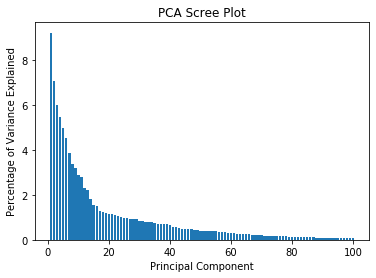

In [6]:
percent_variance_100 = np.round(pca100.explained_variance_ratio_* 100, decimals =2)
plt.bar(x= range(1,101), height=percent_variance_100)
plt.ylabel('Percentage of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

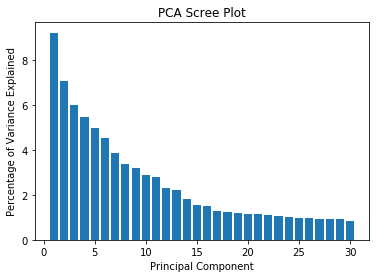

In [7]:
percent_variance_30 = np.round(pca30.explained_variance_ratio_* 100, decimals =2)
plt.bar(x= range(1,31), height=percent_variance_30)
plt.ylabel('Percentage of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

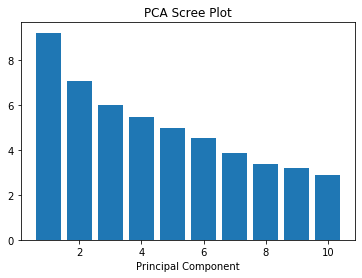

In [8]:
percent_variance_10 = np.round(pca10.explained_variance_ratio_* 100, decimals =2)
columns = [PC_list_10]
plt.bar(x= range(1,11), height=percent_variance_10)
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

### 1.3

* **1.3** Train LogisticRegression(random_state=4,max_iter=10000) with the full dimension X and each of the redued dimension X from PCA in the previous step (100, 30 and 10 dimensions). Print the classification reports for all the models -  this will print the class-wise Precision, Recall and F1 score. More details on classification report can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) (Note: you will be training logistic regression 4 times (160, 100, 30 and 10 dimensional X) and will print 4 classification reports)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

clf_160 = LogisticRegression(random_state = 4, max_iter = 10000).fit(X_train,y_train)

y_pred_160 = clf_160.predict(X_train)

print(classification_report(y_train,y_pred_160))

              precision    recall  f1-score   support

           0       0.80      0.49      0.60      2488
           1       0.99      1.00      1.00    167062

    accuracy                           0.99    169550
   macro avg       0.89      0.74      0.80    169550
weighted avg       0.99      0.99      0.99    169550



In [10]:
clf_100 = LogisticRegression(random_state = 4, max_iter = 10000).fit(df_principalcomponents100,y_train)

y_pred_100 = clf_100.predict(df_principalcomponents100)

print(classification_report(y_train,y_pred_100))

              precision    recall  f1-score   support

           0       0.74      0.22      0.34      2488
           1       0.99      1.00      0.99    167062

    accuracy                           0.99    169550
   macro avg       0.86      0.61      0.67    169550
weighted avg       0.98      0.99      0.98    169550



In [11]:
clf_30 = LogisticRegression(random_state = 4, max_iter = 10000).fit(df_principalcomponents30,y_train)

y_pred_30 = clf_30.predict(df_principalcomponents30)

print(classification_report(y_train,y_pred_30))

              precision    recall  f1-score   support

           0       0.30      0.04      0.07      2488
           1       0.99      1.00      0.99    167062

    accuracy                           0.98    169550
   macro avg       0.64      0.52      0.53    169550
weighted avg       0.98      0.98      0.98    169550



In [12]:
clf_10 = LogisticRegression(random_state = 4, max_iter = 10000).fit(df_principalcomponents10,y_train)

y_pred_10 = clf_10.predict(df_principalcomponents10)

print(classification_report(y_train,y_pred_10))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2488
           1       0.99      1.00      0.99    167062

    accuracy                           0.99    169550
   macro avg       0.49      0.50      0.50    169550
weighted avg       0.97      0.99      0.98    169550



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 1.4

* **1.4** [Plot](https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_roc_curve_visualization_api.html#sphx-glr-auto-examples-miscellaneous-plot-roc-curve-visualization-api-py) the ROC curves for all models (trained using dataset containing all dimensions and dataset containing reduced dimensions, total 4 models). ROC curve is used to study the classifier's output. Details on ROC can be found [here](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html).

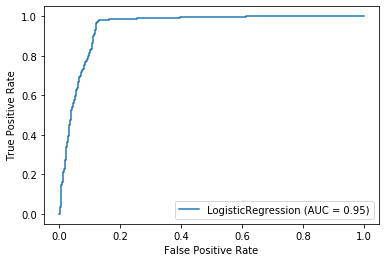

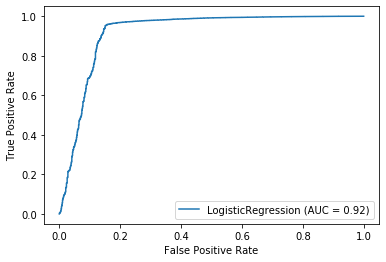

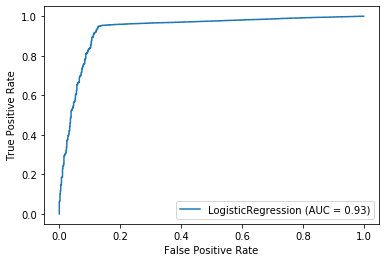

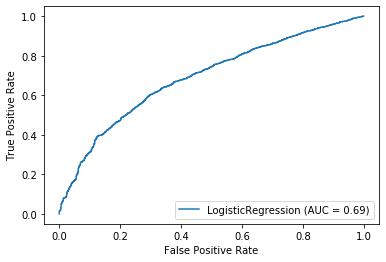

In [13]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(clf_160,X_test,y_test)
plot_roc_curve(clf_100,pca100_test,y_test)
plot_roc_curve(clf_30,pca30_test,y_test)
plot_roc_curve(clf_10,pca10_test,y_test)

### 1.5


The ROC curve AUC values are comparable for the full training data, 100 Principal Components and 30 Principal Components and then drops off a cliff at 10 Principal Components. We can say that 30 Principal Components is sufficient because it retains a huge amount of explanatory power while only having 10 loses a lot of information.

# Question 2 Decision Tree Classifier
Download dataset from [this link](https://drive.google.com/file/d/1iWh0gF2bXOYSnuq843qLxnFphT1HN-lq/view?usp=sharing).

**Customer Eligibility for Deposits**

We will build a Decision Tree classification model to predict if a customer will subscribe or no (yes/no).

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import datasets
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
%matplotlib inline

In [15]:
# Loading the data file
bank=pd.read_csv('bank.csv')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


Input variables:
# bank client data:
1 - `age` (numeric)

2 - `job` : type of job (categorical: 'admin', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')

3 - `marital` : marital status (categorical: 'divorced','married','single'; note: 'divorced' means divorced or widowed)

4 - `education` (categorical: 'primary', 'secondary','tertiary')

5 - `default`: has credit in default? (categorical: 'no','yes','unknown')

6 - `balance`: account balance

7 - `housing`: has housing loan? (categorical: 'no','yes','unknown')

8 - `loan`: has personal loan? (categorical: 'no','yes','unknown')

# related with the last contact of the current campaign:
9 - `contact`: contact communication type (categorical: 'cellular','telephone')

10 - `day_of_month` : 1,2....31

11 - `month`: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

12 - `duration`: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
13 - `campaign`: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - `pdays`: number of days that passed by after the client was last contacted from a previous campaign (numeric; 10000 means client was not previously contacted)

15 - `previous`: number of contacts performed before this campaign and for this client (numeric)

16 - `poutcome`: outcome of the previous marketing campaign (categorical: 'failure','other','success','unknown')

# Output variable (desired target):
17 - `y` - has the client subscribed a term deposit? (binary: 'yes','no')

**All pre-processing is done where categorical variables are converted to numeric values and unnecessary columns are dropped.**

In [16]:
# Make a copy for parsing
bank_data = bank.copy()

# Drop 'contact', as every participant has been contacted. 
bank_data.drop('contact', axis=1, inplace=True)
# Drop 'month' and 'day' as they don't have any intrinsic meaning
bank_data.drop('month', axis=1, inplace=True)
bank_data.drop('day', axis=1, inplace=True)

#Convert categorical values to numeric values
# values for "default" : yes/no
bank_data["default"]
bank_data['default_cat'] = bank_data['default'].map( {'yes':1, 'no':0} )
bank_data.drop('default', axis=1,inplace = True)
# values for "housing" : yes/no
bank_data["housing_cat"]=bank_data['housing'].map({'yes':1, 'no':0})
bank_data.drop('housing', axis=1,inplace = True)
# values for "loan" : yes/no
bank_data["loan_cat"] = bank_data['loan'].map({'yes':1, 'no':0})
bank_data.drop('loan', axis=1, inplace=True)
# values for "deposit" : yes/no
bank_data["deposit_cat"] = bank_data['deposit'].map({'yes':1, 'no':0})
bank_data.drop('deposit', axis=1, inplace=True)

# Convert categorical variables to dummies
bank_data = pd.get_dummies(data=bank_data, columns = ['job', 'marital', 'education', 'poutcome'], \
                                   prefix = ['job', 'marital', 'education', 'poutcome'])

# Convert p_days to a probability value
bank_data['recent_pdays'] = np.where(bank_data['pdays'], 1/bank_data.pdays, 1/bank_data.pdays)
# Drop 'pdays'
bank_data.drop('pdays', axis=1, inplace = True)

In [17]:
bank_data.head()

,age,balance,duration,campaign,previous,default_cat,housing_cat,loan_cat,deposit_cat,job_admin.,...,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,recent_pdays
0,59,2343,1042,1,0,0,1,0,1,1,...,0,0,1,0,0,0,0,0,1,-1.0
1,56,45,1467,1,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,1,-1.0
2,41,1270,1389,1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,1,-1.0
3,55,2476,579,1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,1,-1.0
4,54,184,673,2,0,0,0,0,1,1,...,0,0,0,1,0,0,0,0,1,-1.0


In [18]:
# Splitting the data into training and test data with 80:20 ratio with random_state=50.
# Building the data model
# Train-Test split: 20% test data
X = bank_data.drop('deposit_cat', 1)
Y = bank_data.deposit_cat
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 50)

a. Build a decision tree with depths 2,5,10,20 and max depth using gini and entropy criterion; report the train and test error. Refer [Decisison Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) for more information on how to implement using sklearn.

b. Explain how the train and test accuracy varies as we increase the depth of the tree.

c. List the most important features for the tree with depth=2 and criterion=gini and plot the tree. Name this tree model as `dt2`.

d. Report the accuracy and AUC for the test data and plot the ROC curve using `dt2`.


# Answer 2
## (a)

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error

clf_2g = DecisionTreeClassifier(max_depth = 2, random_state = 50)
clf_2g.fit(X_train,Y_train)
Y_pred_2g = clf_2g.predict(X_train)
print("Max Depth 2, Gini Criterion, Training Error",mean_squared_error(Y_train,Y_pred_2g))


clf_2e = DecisionTreeClassifier(max_depth = 2, criterion = "entropy", random_state = 50)
clf_2e.fit(X_train,Y_train)
Y_pred_2e = clf_2e.predict(X_train)
print("Max Depth 2, Entropy Criterion, Training Error",mean_squared_error(Y_train,Y_pred_2e))

clf_5g = DecisionTreeClassifier(max_depth = 5, random_state = 50)
clf_5g.fit(X_train,Y_train)
Y_pred_5g = clf_5g.predict(X_train)
print("Max Depth 5, Gini Criterion, Training Error",mean_squared_error(Y_train,Y_pred_5g))


clf_5e = DecisionTreeClassifier(max_depth = 5, criterion = "entropy", random_state = 50)
clf_5e.fit(X_train,Y_train)
Y_pred_5e = clf_5e.predict(X_train)
print("Max Depth 5, Entropy Criterion, Training Error",mean_squared_error(Y_train,Y_pred_5e))

clf_10g = DecisionTreeClassifier(max_depth = 10, random_state = 50)
clf_10g.fit(X_train,Y_train)
Y_pred_10g = clf_10g.predict(X_train)
print("Max Depth 10, Gini Criterion, Training Error",mean_squared_error(Y_train,Y_pred_10g))

clf_10e = DecisionTreeClassifier(max_depth = 10, criterion = "entropy", random_state = 50)
clf_10e.fit(X_train,Y_train)
Y_pred_10e = clf_10e.predict(X_train)
print("Max Depth 10, Entropy Criterion, Training Error",mean_squared_error(Y_train,Y_pred_10e))

clf_20g = DecisionTreeClassifier(max_depth = 20, random_state = 50)
clf_20g.fit(X_train,Y_train)
Y_pred_20g = clf_20g.predict(X_train)
print("Max Depth 20, Gini Criterion, Training Error",mean_squared_error(Y_train,Y_pred_20g))


clf_20e = DecisionTreeClassifier(max_depth = 20, criterion = "entropy", random_state = 50)
clf_20e.fit(X_train,Y_train)
Y_pred_20e = clf_20e.predict(X_train)
print("Max Depth 20, Entropy Criterion, Training Error",mean_squared_error(Y_train,Y_pred_20e))

Max Depth 2, Gini Criterion, Training Error 0.27147496920147834
Max Depth 2, Entropy Criterion, Training Error 0.2880501735916676
Max Depth 5, Gini Criterion, Training Error 0.20237428603427035
Max Depth 5, Entropy Criterion, Training Error 0.20013439354910964
Max Depth 10, Gini Criterion, Training Error 0.13663344159480345
Max Depth 10, Entropy Criterion, Training Error 0.14984880725725166
Max Depth 20, Gini Criterion, Training Error 0.015791242020383022
Max Depth 20, Entropy Criterion, Training Error 0.03494232276850711


In [20]:
clf_2g = DecisionTreeClassifier(max_depth = 2, random_state = 50)
clf_2g.fit(X_train,Y_train)
Y_pred_2g_test = clf_2g.predict(X_test)
print("Max Depth 2, Gini Criterion, Test Error",mean_squared_error(Y_test,Y_pred_2g_test))


clf_2e = DecisionTreeClassifier(max_depth = 2, criterion = "entropy", random_state = 50)
clf_2e.fit(X_train,Y_train)
Y_pred_2e_test = clf_2e.predict(X_test)
print("Max Depth 2, Entropy Criterion, Test Error",mean_squared_error(Y_test,Y_pred_2e_test))

clf_5g = DecisionTreeClassifier(max_depth = 5, random_state = 50)
clf_5g.fit(X_train,Y_train)
Y_pred_5g_test = clf_5g.predict(X_test)
print("Max Depth 5, Gini Criterion, Test Error",mean_squared_error(Y_test,Y_pred_5g_test))


clf_5e = DecisionTreeClassifier(max_depth = 5, criterion = "entropy", random_state = 50)
clf_5e.fit(X_train,Y_train)
Y_pred_5e_test = clf_5e.predict(X_test)
print("Max Depth 5, Entropy Criterion, Test Error",mean_squared_error(Y_test,Y_pred_5e_test))

clf_10g = DecisionTreeClassifier(max_depth = 10, random_state = 50)
clf_10g.fit(X_train,Y_train)
Y_pred_10g_test = clf_10g.predict(X_test)
print("Max Depth 10, Gini Criterion, Test Error",mean_squared_error(Y_test,Y_pred_10g_test))

clf_10e = DecisionTreeClassifier(max_depth = 10, criterion = "entropy", random_state = 50)
clf_10e.fit(X_train,Y_train)
Y_pred_10e_test = clf_10e.predict(X_test)
print("Max Depth 10, Entropy Criterion, Test Error",mean_squared_error(Y_test,Y_pred_10e_test))

clf_20g = DecisionTreeClassifier(max_depth = 20, random_state = 50)
clf_20g.fit(X_train,Y_train)
Y_pred_20g_test = clf_20g.predict(X_test)
print("Max Depth 20, Gini Criterion, Test Error",mean_squared_error(Y_test,Y_pred_20g_test))


clf_20e = DecisionTreeClassifier(max_depth = 20, criterion = "entropy", random_state = 50)
clf_20e.fit(X_train,Y_train)
Y_pred_20e_test = clf_20e.predict(X_test)
print("Max Depth 20, Entropy Criterion, Test Error",mean_squared_error(Y_test,Y_pred_20e_test))

Max Depth 2, Gini Criterion, Test Error 0.27317510076130763
Max Depth 2, Entropy Criterion, Test Error 0.29108822212270485
Max Depth 5, Gini Criterion, Test Error 0.2239140170174653
Max Depth 5, Entropy Criterion, Test Error 0.22167487684729065
Max Depth 10, Gini Criterion, Test Error 0.2109270040304523
Max Depth 10, Entropy Criterion, Test Error 0.20824003582624273
Max Depth 20, Gini Criterion, Test Error 0.2561576354679803
Max Depth 20, Entropy Criterion, Test Error 0.26153157187639947


## (b)



## Training Error Findings##
As the max depth increases, the training eror decreases without fail. This is logical, since allowing the classifier to make more splits will always improve accuracy on the training set.
## Test Error Findings##
As max depth increases, the test error decreases initially but reaches an inflection point with a max depth between 10 and 20 max depth where test error begins to increase. This reflects the overfitting of trees that have small incremental improvements on the training data which is picking up noise.

# (c)

In [21]:
best_features=pd.DataFrame(data = clf_2g.feature_importances_, index = X_train.columns,columns=['Features']).sort_values(by='Features',ascending=False)[:2]
print("The best features are", best_features.index[0],"and",best_features.index[1])
best_features

The best features are duration and poutcome_success


,Features
duration,0.849306
poutcome_success,0.150694


[Text(167.4, 181.2, 'X[2] <= 206.5\ngini = 0.499\nsamples = 8929\nvalue = [4700, 4229]'),
 Text(83.7, 108.72, 'X[29] <= 0.5\ngini = 0.327\nsamples = 3612\nvalue = [2867, 745]'),
 Text(41.85, 36.23999999999998, 'gini = 0.273\nsamples = 3380\nvalue = [2828, 552]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.28\nsamples = 232\nvalue = [39, 193]'),
 Text(251.10000000000002, 108.72, 'X[2] <= 441.5\ngini = 0.452\nsamples = 5317\nvalue = [1833, 3484]'),
 Text(209.25, 36.23999999999998, 'gini = 0.5\nsamples = 2762\nvalue = [1340, 1422]'),
 Text(292.95, 36.23999999999998, 'gini = 0.311\nsamples = 2555\nvalue = [493, 2062]')]

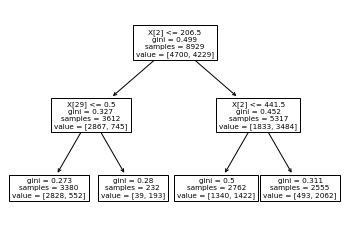

In [22]:
import matplotlib.pyplot as plt
dt2=tree.plot_tree(clf_2g)
dt2

## (d)


d. Report the accuracy and AUC for the test data and plot the ROC curve using `dt2`. 

Accuracy score 0.7268248992386923
AUC 0.7880265888143609


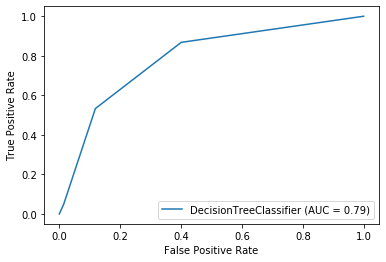

In [23]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score

y_preds = clf_2g.predict_proba(X_test)[:,1]

y_preds2 = clf_2g.predict(X_test)

print("Accuracy score",str(accuracy_score(Y_test, y_preds2)))
print("AUC",str(roc_auc_score(Y_test, y_preds)))



plot_roc_curve(clf_2g,X_test,Y_test)

# Question 3 Pipeline Implementation from Sklearn 

In this question we will build a pipeline to streamline the ML Workflow. Instead of writing code for each logic, pipelines allow to make modeling easy by removing repeated operations. Generally we define the structure of the pipeline, to include the following steps, data pre-processing, feature selection, model building. 

**Part A**

 * Load the dataset from "vehicle.csv". The target variable is denoted by column_name = 'class'. Print the label class,and perform [LabelEncoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) on them using sklearn.preprocessing.LabelEncoder.

 * Seperate the dataset into features,labels. Split the dataset into train and test set with 20% data in test set and random_state = 50

**Part B**

Now, we will build [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) with the following steps. Remeber to fit the pipeline on training set and predict on test set. Finally report the classification accuracy on the test set.

 * Data Pre-processing : Using SimpleImputer with strategy = 'mean'
 * Standardization : Standardize features by removing the mean and scaling to unit variance using StandardScaler()
 * Model : Use DecisionTreeClassifier with default values
  

**Part C**
  
In part C, we will build on top of the previous part B. In addition to the three steps we will add PCA to the pipeline and use [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to find the best parameters for PCA(number of components) and DecisionTree(max_depth).
  
 * Data Pre-processing : Using SimpleImputer with strategy = 'mean'
 * Standardization : Standardize features by removing the mean and scaling to unit variance using StandardScaler()
 * PCA : Use PCA()
 * Model : Use DecisionTreeClassifier with default values
  
We will now use [GridSearchCV] with default values(https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to estimate best parameters for pca(n_components = [5,8,10]) and Decision Tree (max_depth = [3,5,15]) using the pipeline designed. 

* **Hint:** The `param_grid` argument to gridsearch will be given as `{param_grid={'clf__max_depth': [3, 5, 15], 'pca__n_components': [5, 8, 10]}}`. 

Print the best parameters found by gridsearch. Finally, update the best parameters to the pipeline using pipe_pca.set_params("best params from gridsearchCV"), and report the classification accuracy on test set.

              

In [24]:
#part a
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
vehicles = pd.read_csv('vehicle.csv')
vehicles['class'].head()

0    van
1    van
2    car
3    van
4    bus
Name: class, dtype: object

In [25]:
le = LabelEncoder()
vehicles['classes'] = le.fit_transform(vehicles['class'])
vehicles['classes'].head()

0    2
1    2
2    1
3    2
4    0
Name: classes, dtype: int32

In [26]:
X = vehicles.drop(['classes','class'],axis=1)
y = vehicles['classes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [27]:
#part b
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

pipe = Pipeline([('impute', SimpleImputer(missing_values = np.nan, strategy='mean')),
                 ('scaler', StandardScaler()),
                 ('dtc', DecisionTreeClassifier())])

pipe.fit(X_train, y_train)
y_preds = pipe.predict(X_test)
accuracy_score(y_test, y_preds)

0.888235294117647

In [28]:
#part c
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

pipe_pca = Pipeline([('impute', SimpleImputer(missing_values = np.nan, strategy='mean')),
                     ('scaler', StandardScaler()),
                     ('pca', PCA()),
                     ('clf', DecisionTreeClassifier())])

param_grid = {'clf__max_depth': [3, 5, 15], 
              'pca__n_components': [5, 8, 10]}

search = GridSearchCV(pipe_pca, param_grid)
search.fit(X_train, y_train)
print('best params:',str(search.best_params_))

params = search.best_params_
pipe_pca.set_params(**params)

pipe_pca.fit(X_train, y_train)
y_preds = pipe_pca.predict(X_test)
print('accuracy score:',str(accuracy_score(y_test,y_preds)))

best params: {'clf__max_depth': 15, 'pca__n_components': 10}
accuracy score: 0.8470588235294118


# Question 4 Reject option

Consider a binary classification problem with the following loss matrix - where the cost of rejection is a constant. 

$$
   {\begin{array}{ccccc}
   & & \text{Predicted class} & \text{           } &\\
   & & C1 & C2 & Reject\\
   \text{True class} & C1 & 0 & 3 & c  \\
   & C2 & 2 & 0 & c \\
  \end{array} } 
$$

Determine the prediction that minimizes the expected loss in different ranges of $P(C1|x)$ where c = 1

Where P(C1|x) = 0:
- C1 = 0\*0 + 2\*1 = 2
- C2 = 3\*0 + 0\*1 = 0 (choose C2 for lower bound)

Where P(C1|x) = 1:
- C1 = 0\*1 + 2\*0 = 0
- C2 = 3\*1 + 0\*0 = 3 (Choose C1 for upper bound)

Where C1 and C2 intersect:
- 0\*P(C1|x) + 2\*(1-P(C1|x)) = 3\*P(C1|x) + 0\*(1-P(C1|x))
- 2\*(1-P(C1|x) = 3\*P(C1|x)
- 2 - 2P(C1|x) = 3P(C1|x)
- 5P(C1|x) = 2
- P(C1|x) = 2/5

Reject range:
- 3P(C1|x) >= 1
- P(C1|x) >= 1/3 (lower bound)
- 2(1-P(C1|x)) >= 1
- 2 - 2P(C1|x) >= 1
- 1 >= 2P(C1|x)
- P(C1|x) <= 1/2

Prediction that minimizes expected loss:
- C2 when P(C1|x) <= 1/3
- reject when 1/3 <= P(C1|x) <= 1/2
- C1 when P(C1|x) >= 1/2